# Boston Housing

## Project Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? 

Upper management will like to get some insight into the following.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management and give them important insight given the question they are asking. In your graphs, include an explanation of each statistic. 

## Load the Data

Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

Read the dataset in the csv file from the URL

In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

## Explore the Data

#### Dataset Variables and Descriptions



·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



#### Dataframe and Summary Statistics

Print the first few lines of the dataframe to get an idea of how the data is structured. 

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The column "Unnamed: 0" is not necessary and is removed.

In [4]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Next, check the data for 'null' values using df.info(). 

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Finally, print out summary statistics for each variable.

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Create Visualizations

Generate the following visuals and explain your findings:

1. A boxplot showing the Median value of owner-occupied homes (MEDV)

2. A bar plot for the Charles river variable (CHAS)

3. A boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. A scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 

5. A histogram for the pupil to teacher ratio variable (PTRATIO)



### Median value of Owner Occupied Homes: Boxplot

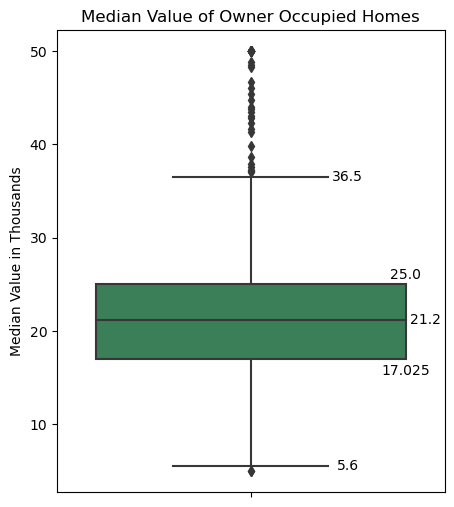

In [7]:

# Get Quartile values for annotation
median_val = np.median(boston_df['MEDV'])
med = str(median_val)
boxdict = boston_df.boxplot('MEDV', grid = False, figsize = (5,6), return_type = 'dict')
twenty_five = boxdict['boxes'][0].get_ydata()[0]
firstQ = str(twenty_five)
seventy_five = boxdict['boxes'][0].get_ydata()[2]
thirdQ = str(seventy_five)
bottom = boxdict['caps'][0].get_ydata()[0]
b_cap = str(bottom)
top = boxdict['caps'][1].get_ydata()[0]
t_cap = str(top)

ax = sns.boxplot(y='MEDV', data=boston_df, color='seagreen')

pyplot.text(.45, median_val, med, ha='center', va='center',fontsize = 10)
pyplot.text(.40, twenty_five-1.25, firstQ, ha='center', va='center',fontsize = 10)
pyplot.text(.40, seventy_five+1, thirdQ, ha='center', va='center',fontsize = 10)
pyplot.text(.25, bottom, b_cap, ha='center', va='center',fontsize = 10)
pyplot.text(.25, top, t_cap, ha='center', va='center',fontsize = 10)

ax.set_ylabel("Median Value in Thousands")
ax.set_title('Median Value of Owner Occupied Homes')


pyplot.show()

The boxplot is symmetric, so MEDV has a normal distribution. The bulk of the data ranges from 5.6 to 36.5, but there are several outliers with values above 36.5 (the maximum is at 50). Half of the values fall between 17.025 and 25.0 with a median of 21.2. 

### Charles River Tracts: Bar Chart

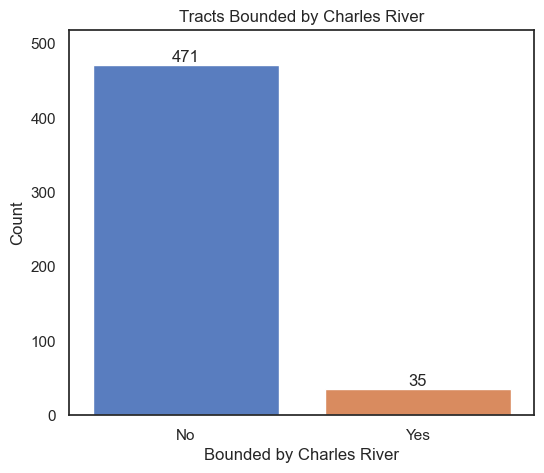

In [10]:
sns.set(rc={"figure.figsize":(6, 5)}) #width=6, height=5
sns.set_style('white')
ax = sns.countplot(boston_df, x="CHAS", palette = 'muted')
pyplot.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Set text labels and properties.
#x_labels = ['No','Yes']
ax.set_xlabel('Bounded by Charles River')
ax.set_ylabel('Count')
ax.set_title('Tracts Bounded by Charles River')
#ax.set_xticklabels(x_labels)
ax.bar_label(ax.containers[0], label_type='edge')
# Adjusting margins for clarity
ax.margins(y=0.1)
pyplot.show()

The bar chart shows that the number of tracts bounded by the Charles River is approximately 13.5 times the number of tracts that are not.

### MEDV vs AGE: Box Plot

The 'AGE' variable represents the age of owner-occupied homes. Discretize this variable into three groups: 35 years and younger, between 35 and 70 years, and 70 years and older. 

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


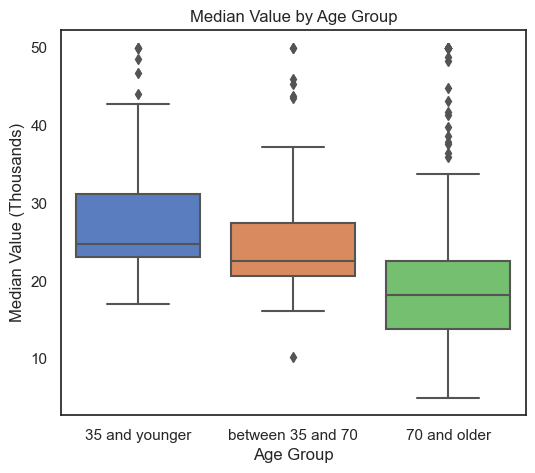

In [13]:
sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette = 'muted',order = ['35 and younger','between 35 and 70','70 and older'])
pyplot.title('Median Value by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (Thousands)')
pyplot.show()

The plot shows that as age increases, median value decreases. Both age groups under 70 years have a right-skewed distribution - the median is closer to the box’s lower values and the upper whisker is longer. The 70 and older age group follows a normal distribution; but with several outliers of high value.  The 70 and older group also has the highest variability.

### Nitric Oxide Concentrations & the Proportion of Non-retail Business Acres per Town: Scatterplot

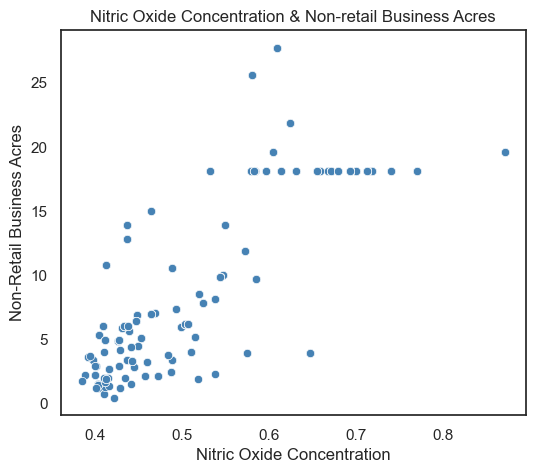

In [14]:
sns.set_style('white')
ax1 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color = 'steelblue')
pyplot.title('Nitric Oxide Concentration & Non-retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentration')
pyplot.ylabel('Non-Retail Business Acres')
pyplot.show()

The scatterplot displays a positive relationship between the two variables. As Nitric Oxide increases, the proportion of non-retail business acres also tend to increase, at least until the nitric oxide concentration reaches 0.65. Beyond that point, the proportion of non-retail business acres pretty much remains the same. 

### Pupil to Teacher Ratio: Histogram

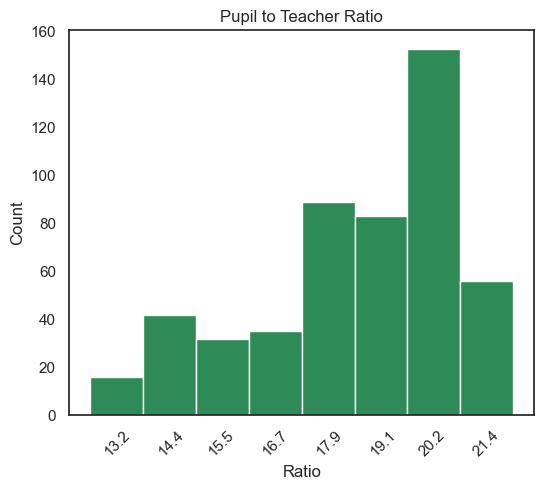

In [15]:
n, bins, edges = pyplot.hist(boston_df['PTRATIO'],bins=8,color='seagreen')
ticks  = bins[:-1] + np.diff(bins) / 2
pyplot.xticks(np.round(ticks,1), rotation = 45)
#pyplot.xticks(np.round(bins,1),rotation = 45)
pyplot.title('Pupil to Teacher Ratio')
pyplot.xlabel('Ratio')
pyplot.ylabel('Count')
pyplot.show()

The distribution of the pupil to teacher ratio is left skewed. The ratio with the highest count is 20.2. 

## Analysis

Answer the following questions using the appropriate statistical test. Be sure to state your hypothesis and the conclusion reached from the test. Use α = 0.05 for all tests.

1. Is there a significant difference in median value of houses (MEDV) bounded by the Charles river & those not bounded by the river (CHAS)? 

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

3. Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?

4. What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes(MEDV)? 

### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? 

#### Hypothesis

* $H_0: µ_1 = µ_2$ ("there is no difference in median value between bounded and non-bounded tracts")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value between bounded and non-bounded tracts")


#### Test the Hypothesis

Use a T-test for independent samples to test the hypothesis. 





Create two data frames: one for observations in which "CHAS" is equal to 1 (Bounded), and another for those in which "CHAS" equals 0 (Not Bounded).  

In [22]:
Not_bordered = boston_df[boston_df['CHAS']==0]
Bordered = boston_df[boston_df['CHAS']==1]

In [23]:
scipy.stats.ttest_ind(Not_bordered['MEDV'], Bordered['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** The p-value is less than the alpha value of 0.05, so we reject the null hypothesis. There is enough proof that there is a statistical difference in median value of tracts bound and those not bound by the Charles River.

### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

Compare the three age groups that were created for the boxplot.

#### Hypothesis

* $H_0: µ_1 = µ_2 = µ_3$ ("The three median values are equal")
* $H_1$: There is a difference in at least one median value


#### Test the Hypothesis

Use one-way ANOVA to test the hypothesis. 





First, check for for equality of variance using the Levene test.

In [24]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we will assume equality of variance of the three groups.

Next, separate each age group into a variable containing values for MEDV.

In [19]:
thirty_five_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirty_five_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

Finally, run a one-way ANOVA.

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** We reject the null hypothesis since the p-value is less than 0.05. There is significant evidence that at least one of the median values differ.

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

#### Hypothesis

* $H_0:$ Nitric Oxide concentration is not correlated with the proportion of non-retail business acres
* $H_1:$ Nitric Oxide concentration is correlated with the proportion of non-retail business acres



#### Test the Hypothesis

Since they are both continuous variables we can use a pearson correlation test. 




In [26]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209161, pvalue=7.913361061230596e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed))  < 0.05, reject  the Null hypothesis. There exists a relationship between Nitic Oxide concentration and the proportion of non-retail business acres per town. This conclusion confirms our finding of the scatterplot created earlier.


### Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 

#### Hypothesis

* $H_0:$ There is no statistically significant relationship btw DIS and MEDV (no impact)
* $H_1:$ There is a statistically significant relationship btw DIS and MEDV



#### Test the Hypothesis

Use OLS regression to test the hypothesis. 

"MEDV" is the response variable and "DIS" is the predictor.





In [27]:
### insert code here
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
#predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:07:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The P-value is less than 0.05, so reject the null hypothesis. There is significant evidence that weighted distance to the five Boston employment centers has an impact on median value.
The coefficient for "DIS" is 1.0916. This means that for each unit increase of the weighted distance, the median value increases by 1.0916, on average.